In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_edgelist("data/advogato.txt")
G = G.to_undirected()
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)
matrix = nx.adjacency_matrix(G).toarray()

In [2]:
n_values = range(1, 3)  # Valores de n para calcular A^n

In [3]:
# time 15m 17.8s
for n in n_values:
    An = np.linalg.matrix_power(matrix, n)

In [5]:
# time 1m 58.0s
eigenvalues, eigenvectors = np.linalg.eig(matrix)
eigenvectors_inv = np.linalg.inv(eigenvectors)
for n in n_values:
    Dn = np.diag(eigenvalues ** n)
    An = eigenvectors @ Dn @ eigenvectors_inv

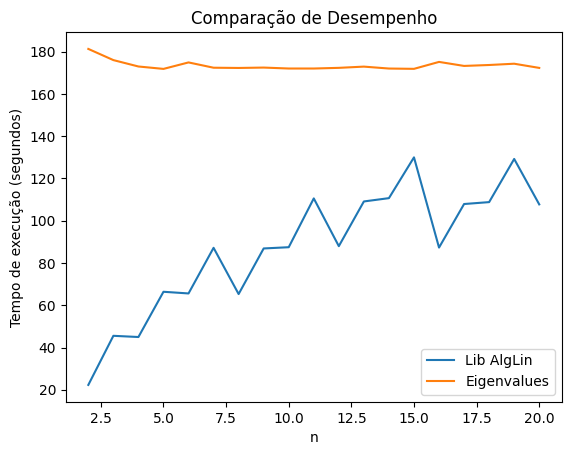

In [6]:
import numpy as np
import networkx as nx
import time
import matplotlib.pyplot as plt

N = 10000
matrix = 10*np.random.rand(N,N)

n_values = np.arange(2, 21)

execution_times_lib = []
execution_times_diagonal = []

eigenvalues, eigenvectors = np.linalg.eig(matrix)
eigenvectors_inv = np.linalg.inv(eigenvectors)

for n in n_values:
    start_time = time.time()
    matrix_power = np.linalg.matrix_power(matrix, n)
    end_time = time.time()
    execution_time_lib = end_time - start_time
    execution_times_lib.append(execution_time_lib)

    start_time = time.time()
    D_power = np.diag(eigenvalues ** n)
    M_power = np.real(eigenvectors @ D_power @ eigenvectors_inv)
    end_time = time.time()
    execution_time_diagonal = end_time - start_time
    execution_times_diagonal.append(execution_time_diagonal)
    
    #print(matrix_power)
    #print(M_power)

plt.plot(n_values, execution_times_lib, label='Lib AlgLin')
plt.plot(n_values, execution_times_diagonal, label='Eigenvalues')
plt.xlabel('n')
plt.ylabel('Tempo de execução (segundos)')
plt.title('Comparação de Desempenho')
plt.legend()
plt.show()